In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,KFold,  cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import  accuracy_score, roc_auc_score, classification_report, mean_squared_error,mean_absolute_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imblearn import over_sampling,under_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [2]:
data=pd.read_csv('predictive_maintenance.csv')

In [3]:
print(data.describe)

<bound method NDFrame.describe of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]

In [4]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Failure Type'>

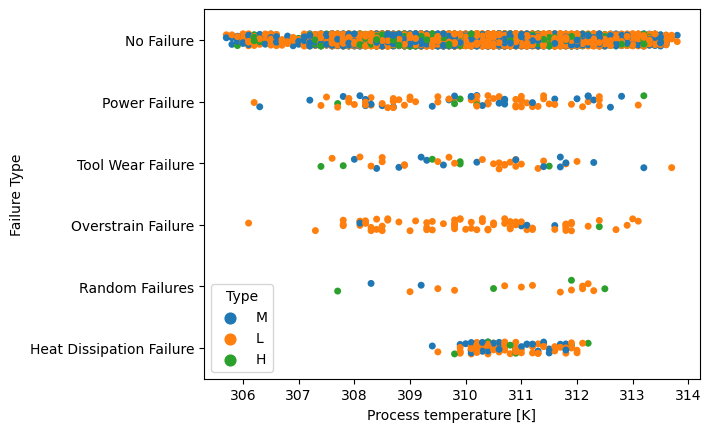

In [7]:
sns.stripplot(y='Failure Type',x='Process temperature [K]',hue='Type',data=data)

In [8]:
dummies=pd.get_dummies(data['Type'],drop_first=True).head(5)

In [9]:
data=pd.concat([data,dummies],axis=1)

In [10]:
data.drop(['Type'],axis=1,inplace=True)

In [11]:
data

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,L,M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,4,L47183,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,5,L47184,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,No Failure,NaN,NaN
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,No Failure,NaN,NaN
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,No Failure,NaN,NaN
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,No Failure,NaN,NaN


In [12]:
data

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,L,M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,4,L47183,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,5,L47184,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,No Failure,NaN,NaN
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,No Failure,NaN,NaN
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,No Failure,NaN,NaN
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,No Failure,NaN,NaN


In [13]:
data.isna().sum()

UDI                           0
Product ID                    0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
L                          9995
M                          9995
dtype: int64

In [14]:
data['L'].fillna(data['L'].median(),inplace=True)

In [15]:
data.isna().sum()

UDI                           0
Product ID                    0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
L                             0
M                          9995
dtype: int64

In [16]:
data['M'].fillna(data['M'].median(),inplace=True)

In [17]:
data.isna().sum()

UDI                        0
Product ID                 0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
L                          0
M                          0
dtype: int64

In [18]:
data

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,L,M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,4,L47183,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,5,L47184,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,No Failure,1.0,0.0
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,No Failure,1.0,0.0
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0


<AxesSubplot:>

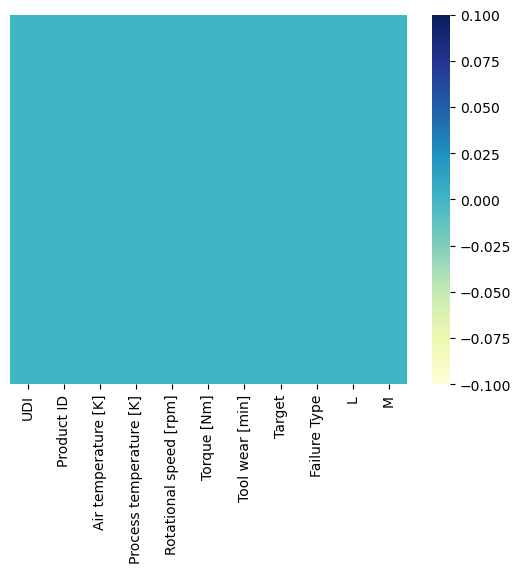

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="YlGnBu")

In [20]:
data.drop(['Product ID'],axis=1,inplace=True)

In [21]:
data

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,L,M
0,1,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,2,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,3,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,4,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,5,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,No Failure,1.0,0.0
9996,9997,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0
9997,9998,299.0,308.6,1645,33.4,22,0,No Failure,1.0,0.0
9998,9999,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0


In [22]:
data.isna().sum()

UDI                        0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
L                          0
M                          0
dtype: int64

In [23]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,L,M
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.9999,0.0001
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.0100,0.0100
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.0000,0.0000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1.0000,0.0000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,1.0000,0.0000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,1.0000,0.0000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.0000,1.0000


In [24]:
data.drop(['UDI'],axis=1,inplace=True)

In [25]:
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,L,M
0,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1.0,0.0
9996,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0
9997,299.0,308.6,1645,33.4,22,0,No Failure,1.0,0.0
9998,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0


In [26]:
data = data.rename(mapper={'Air temperature [K]': 'Air temperature',
                           'Process temperature [K]': 'Process temperature',
                           'Rotational speed [rpm]': 'Rotational speed',
                           'Torque [Nm]': 'Torque',
                           'Tool wear [min]': 'Tool wear'},axis=1)

In [27]:
data

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type,L,M
0,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1.0,0.0
9996,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0
9997,299.0,308.6,1645,33.4,22,0,No Failure,1.0,0.0
9998,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0


In [28]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [29]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [30]:
df_failure = data[data['Target'] == 1]
df_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

9 values are classified as failure in the 'Target' variable but as No Failure in the 'Failure Type' variable.

# Insight 1

In [31]:
df_failure[df_failure['Failure Type'] == 'No Failure']

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type,L,M
1437,298.8,309.9,1439,45.2,40,1,No Failure,1.0,0.0
2749,299.7,309.2,1685,28.9,179,1,No Failure,1.0,0.0
4044,301.9,310.9,1419,47.7,20,1,No Failure,1.0,0.0
4684,303.6,311.8,1421,44.8,101,1,No Failure,1.0,0.0
5536,302.3,311.8,1363,54.0,119,1,No Failure,1.0,0.0
5941,300.6,310.7,1438,48.5,78,1,No Failure,1.0,0.0
6478,300.5,309.8,1663,29.1,145,1,No Failure,1.0,0.0
8506,298.4,309.6,1710,27.3,163,1,No Failure,1.0,0.0
9015,297.2,308.1,1431,49.7,210,1,No Failure,1.0,0.0


In [32]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'No Failure'].index
data.drop(index_possible_failure, axis=0, inplace=True)

In [33]:
data

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type,L,M
0,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1.0,0.0
9996,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0
9997,299.0,308.6,1645,33.4,22,0,No Failure,1.0,0.0
9998,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0


In [34]:
df_failure = data[data['Target'] == 0]
df_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

we have 18 instances classifed as Random Failures by 'Failure Type', whereas they are classifed as Not failure by the 'Target Variable'. 

In [35]:
df_failure[df_failure['Failure Type'] == 'Random Failures']

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type,L,M
1221,297.0,308.3,1399,46.4,132,0,Random Failures,1.0,0.0
1302,298.6,309.8,1505,45.7,144,0,Random Failures,1.0,0.0
1748,298.4,307.7,1626,31.1,166,0,Random Failures,1.0,0.0
2072,299.6,309.5,1570,35.5,189,0,Random Failures,1.0,0.0
2559,299.3,309.0,1447,50.4,140,0,Random Failures,1.0,0.0
3065,300.1,309.2,1687,27.7,95,0,Random Failures,1.0,0.0
3452,301.6,310.5,1602,32.3,2,0,Random Failures,1.0,0.0
5471,302.7,312.3,1346,61.2,170,0,Random Failures,1.0,0.0
5489,302.6,312.1,1499,35.0,215,0,Random Failures,1.0,0.0
5495,302.9,312.5,1357,55.0,12,0,Random Failures,1.0,0.0


In [36]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'Random Failures'].index
data.drop(index_possible_failure, axis=0, inplace=True)

In [37]:
data.shape[0]

9973

In [38]:
data

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type,L,M
0,298.1,308.6,1551,42.8,0,0,No Failure,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,No Failure,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,No Failure,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,No Failure,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,No Failure,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1.0,0.0
9996,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0
9997,299.0,308.6,1645,33.4,22,0,No Failure,1.0,0.0
9998,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0


27 instaces were removed (0.27% of the entire dataset)

<AxesSubplot:xlabel='Air temperature', ylabel='Failure Type'>

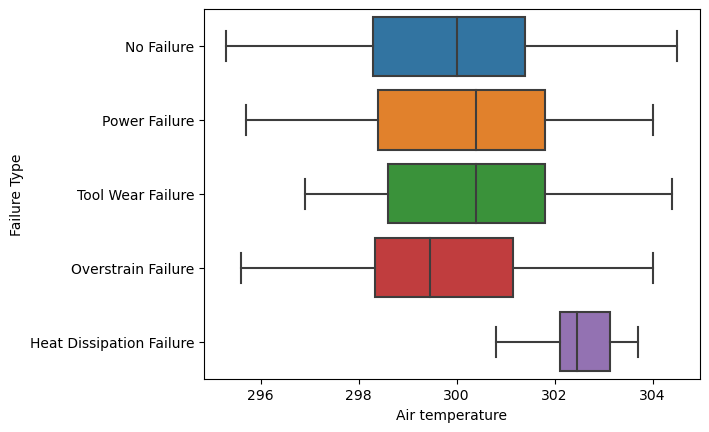

In [39]:
sns.boxplot(y='Failure Type',x='Air temperature',data=data)

<AxesSubplot:>

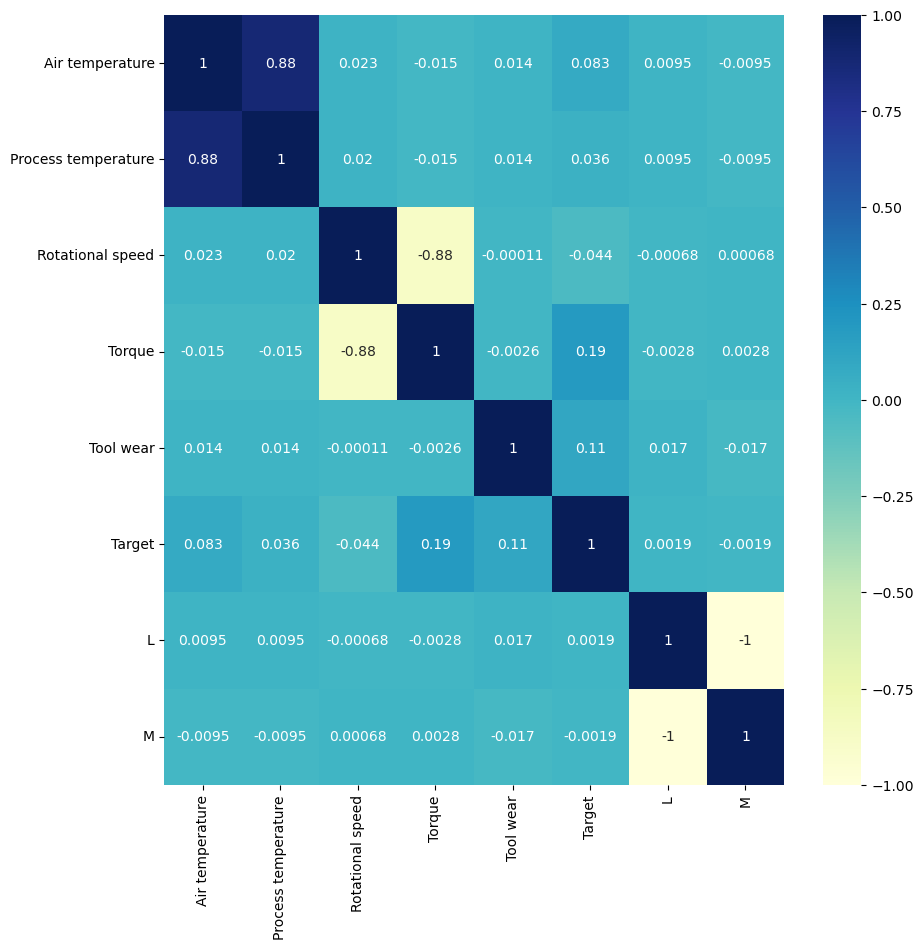

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap="YlGnBu")

In [41]:
le=LabelEncoder()
new_data=le.fit_transform(data['Failure Type'])


In [42]:
new_data

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
data.drop(['Failure Type'],axis=1,inplace=True)


In [44]:
new_df=pd.DataFrame(new_data,index=data.index,columns=['Failure Type'])

In [45]:
df=pd.concat([data,new_df],axis=1)

In [46]:
df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
0,298.1,308.6,1551,42.8,0,0,0.0,1.0,1
1,298.2,308.7,1408,46.3,3,0,1.0,0.0,1
2,298.1,308.5,1498,49.4,5,0,1.0,0.0,1
3,298.2,308.6,1433,39.5,7,0,1.0,0.0,1
4,298.2,308.7,1408,40.0,9,0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,1.0,0.0,1
9996,298.9,308.4,1632,31.8,17,0,1.0,0.0,1
9997,299.0,308.6,1645,33.4,22,0,1.0,0.0,1
9998,299.0,308.7,1408,48.5,25,0,1.0,0.0,1


In [47]:
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089,0.999900,0.000100,1.029179
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879,0.010014,0.010014,0.311323
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1.000000,0.000000,1.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,1.000000,0.000000,1.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000,1.000000,0.000000,1.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,4.000000


<AxesSubplot:xlabel='Failure Type', ylabel='Air temperature'>

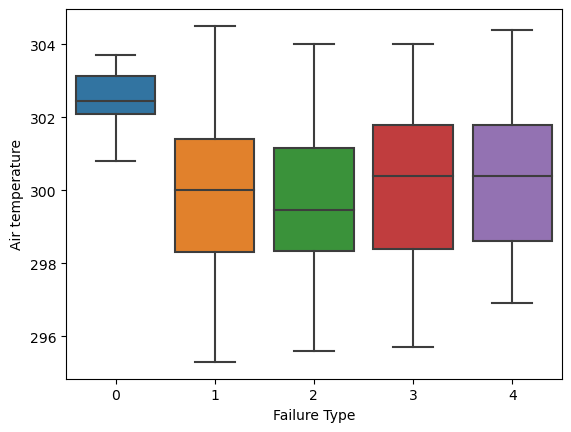

In [48]:
sns.boxplot(y='Air temperature',x='Failure Type',data=df)

<AxesSubplot:xlabel='Failure Type', ylabel='Process temperature'>

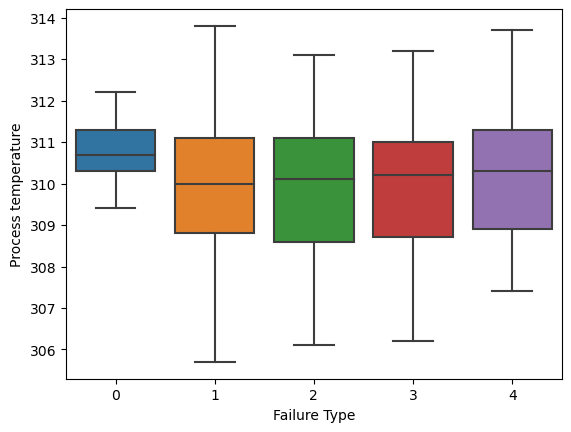

In [49]:
sns.boxplot(y='Process temperature',x='Failure Type',data=df)

<AxesSubplot:ylabel='Rotational speed'>

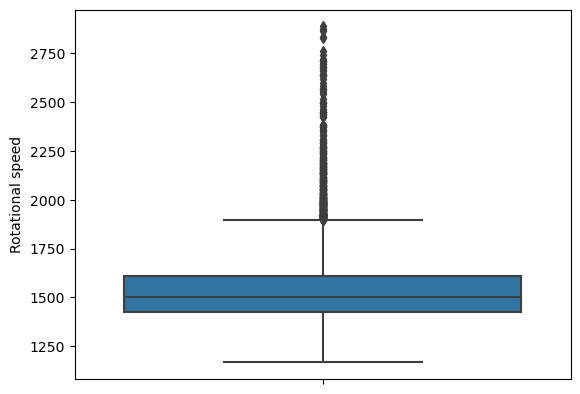

In [50]:
sns.boxplot(y='Rotational speed',data=df)

In [51]:
lower_limit=df['Rotational speed'].quantile(0.01)

In [52]:
lower_limit

1275.0

In [53]:
upper_limit=df['Rotational speed'].quantile(0.94)

In [54]:
upper_limit

1832.0

In [55]:
new_df=df[df['Rotational speed']<upper_limit]

In [56]:
new_df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
0,298.1,308.6,1551,42.8,0,0,0.0,1.0,1
1,298.2,308.7,1408,46.3,3,0,1.0,0.0,1
2,298.1,308.5,1498,49.4,5,0,1.0,0.0,1
3,298.2,308.6,1433,39.5,7,0,1.0,0.0,1
4,298.2,308.7,1408,40.0,9,0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,1.0,0.0,1
9996,298.9,308.4,1632,31.8,17,0,1.0,0.0,1
9997,299.0,308.6,1645,33.4,22,0,1.0,0.0,1
9998,299.0,308.7,1408,48.5,25,0,1.0,0.0,1


<AxesSubplot:ylabel='Rotational speed'>

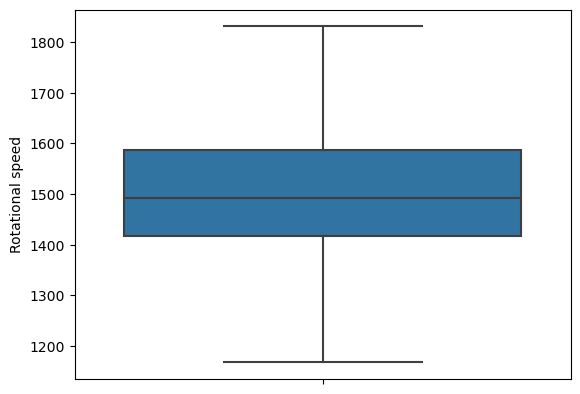

In [57]:
sns.boxplot(y='Rotational speed',data=new_df)

<AxesSubplot:ylabel='Torque'>

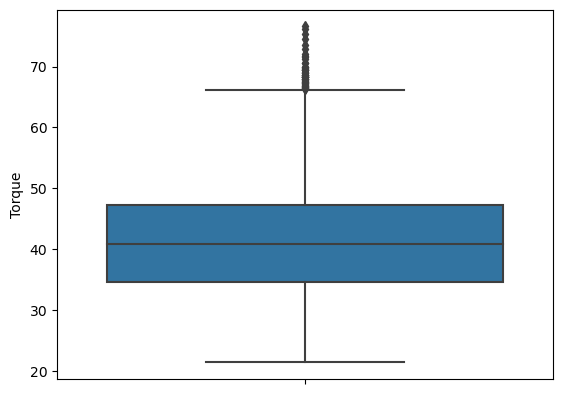

In [58]:
sns.boxplot(y='Torque',data=new_df)

In [59]:
upper_limit=new_df['Torque'].quantile(0.99)

In [60]:
upper_limit

63.0

In [61]:
new_df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
count,9371.000000,9371.000000,9371.000000,9371.000000,9371.000000,9371.000000,9371.000000,9371.000000,9371.000000
mean,299.990086,309.999029,1507.384591,41.239878,108.000960,0.031267,0.999893,0.000107,1.022516
std,1.997860,1.481817,122.120265,8.855879,63.593583,0.174047,0.010330,0.010330,0.290778
min,295.300000,305.700000,1168.000000,21.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1418.000000,34.600000,53.000000,0.000000,1.000000,0.000000,1.000000
50%,300.100000,310.100000,1493.000000,40.800000,108.000000,0.000000,1.000000,0.000000,1.000000
75%,301.500000,311.000000,1587.000000,47.200000,162.000000,0.000000,1.000000,0.000000,1.000000
max,304.500000,313.800000,1831.000000,76.600000,253.000000,1.000000,1.000000,1.000000,4.000000


In [62]:
new_df=new_df[new_df['Torque']<upper_limit]

In [63]:
new_df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
0,298.1,308.6,1551,42.8,0,0,0.0,1.0,1
1,298.2,308.7,1408,46.3,3,0,1.0,0.0,1
2,298.1,308.5,1498,49.4,5,0,1.0,0.0,1
3,298.2,308.6,1433,39.5,7,0,1.0,0.0,1
4,298.2,308.7,1408,40.0,9,0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,1.0,0.0,1
9996,298.9,308.4,1632,31.8,17,0,1.0,0.0,1
9997,299.0,308.6,1645,33.4,22,0,1.0,0.0,1
9998,299.0,308.7,1408,48.5,25,0,1.0,0.0,1


<AxesSubplot:ylabel='Torque'>

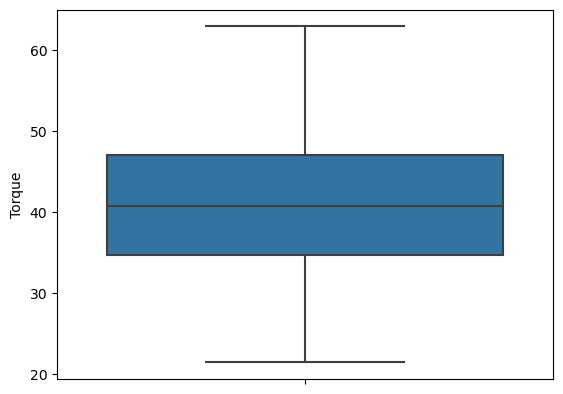

In [64]:
sns.boxplot(y='Torque',data=new_df)

<AxesSubplot:ylabel='Tool wear'>

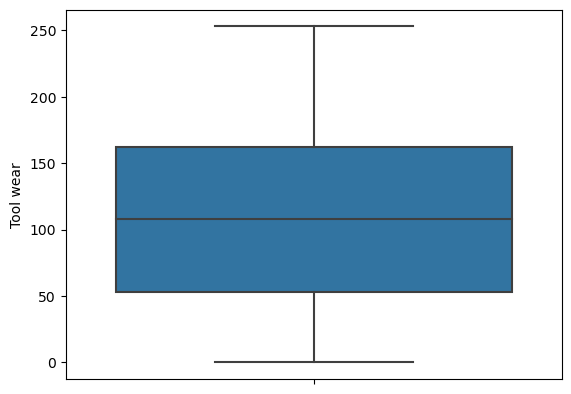

In [65]:
sns.boxplot(y='Tool wear',data=new_df)

In [66]:
new_df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
count,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000,9276.000000
mean,299.986708,309.997380,1509.590341,40.976445,108.038271,0.024903,0.999892,0.000108,1.011859
std,1.998635,1.482543,120.657908,8.502085,63.573145,0.155838,0.010383,0.010383,0.251507
min,295.300000,305.700000,1183.000000,21.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1420.000000,34.600000,53.000000,0.000000,1.000000,0.000000,1.000000
50%,300.100000,310.100000,1495.000000,40.700000,108.000000,0.000000,1.000000,0.000000,1.000000
75%,301.500000,311.000000,1588.000000,47.000000,162.000000,0.000000,1.000000,0.000000,1.000000
max,304.500000,313.800000,1831.000000,62.900000,253.000000,1.000000,1.000000,1.000000,4.000000


In [67]:
new_df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,L,M,Failure Type
0,298.1,308.6,1551,42.8,0,0,0.0,1.0,1
1,298.2,308.7,1408,46.3,3,0,1.0,0.0,1
2,298.1,308.5,1498,49.4,5,0,1.0,0.0,1
3,298.2,308.6,1433,39.5,7,0,1.0,0.0,1
4,298.2,308.7,1408,40.0,9,0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,1.0,0.0,1
9996,298.9,308.4,1632,31.8,17,0,1.0,0.0,1
9997,299.0,308.6,1645,33.4,22,0,1.0,0.0,1
9998,299.0,308.7,1408,48.5,25,0,1.0,0.0,1


In [68]:
new_df.shape

(9276, 9)

In [69]:
no_failure=new_df[new_df['Target']==0]
failure=new_df[new_df['Target']==1]

In [70]:
no_failure.shape

(9045, 9)

In [71]:
failure.shape

(231, 9)

In [72]:
print(no_failure.shape,failure.shape,new_df.shape)

(9045, 9) (231, 9) (9276, 9)


## Model

In [73]:
X=new_df.drop(['Target','Failure Type'],axis=1)
y=new_df['Target']

In [74]:
pip install imblearn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Oversampling

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 9045), (1, 9045)] (18090,)


In [76]:
X_resampled.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'L', 'M'],
      dtype='object')

In [77]:
y_resampled.value_counts()

0    9045
1    9045
Name: Target, dtype: int64

## DecisionTree

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [79]:
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [80]:
dt = DecisionTreeClassifier(min_samples_split=700,min_samples_leaf=300)
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=300, min_samples_split=700)

In [81]:
y_train.value_counts()

1    7239
0    7233
Name: Target, dtype: int64

In [82]:
y_test.value_counts()

0    1812
1    1806
Name: Target, dtype: int64

In [83]:
X_train.shape

(14472, 7)

In [84]:
X_train.shape[0]*.02

289.44

In [85]:
X_test.shape

(3618, 7)

In [86]:
 fig = plt.figure(figsize=(150,60))

treeplt = tree.plot_tree(dt,
                        feature_names=X_train,
                        filled=True,
                        class_names=['No failure','Failure'])

In [87]:
y_pred=dt.predict(X_test)

In [88]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [89]:
kf = KFold()

In [90]:
cross_val=cross_val_score(dt,X_train,y_train,cv=kf)

In [91]:
cross_val

array([0.91744387, 0.92849741, 0.91637871, 0.92398065, 0.9333103 ])

In [92]:
accuracy=round(accuracy_score(y_test,y_pred)*100,2)

In [93]:
roc_auc_dt=round(roc_auc_score(y_test,y_pred)*100,2)

In [94]:
print("Model Accuracy Score :",accuracy,"%")
print("roc auc score:",roc_auc_dt)
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("cross validation:",cross_val)

Model Accuracy Score : 93.56 %
roc auc score: 93.57
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1812
           1       0.90      0.98      0.94      1806

    accuracy                           0.94      3618
   macro avg       0.94      0.94      0.94      3618
weighted avg       0.94      0.94      0.94      3618

cross validation: [0.91744387 0.92849741 0.91637871 0.92398065 0.9333103 ]


## SVM

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [96]:
clf=SVC(kernel="linear")
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [97]:
y_train.value_counts()

1    7239
0    7233
Name: Target, dtype: int64

In [98]:
 y_pred_svm=clf.predict(X_test)

In [99]:
y_pred_svm

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [100]:
kf = KFold()

In [101]:
cross_val=cross_val_score(clf,X_train,y_train,cv=kf)

In [102]:
cross_val

array([0.83972366, 0.85354059, 0.83932274, 0.85003455, 0.85521769])

In [103]:
accuracy_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)

In [104]:
roc_svm=round(roc_auc_score(y_test,y_pred_svm)*100,2)

In [105]:
print("Model Accuracy Score :",accuracy_svm,"%")
print("roc auc score:",roc_svm)
print("Classification_Report: \n",classification_report(y_test,y_pred_svm))
print("cross validation:",cross_val)

Model Accuracy Score : 85.43 %
roc auc score: 85.44
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1812
           1       0.83      0.89      0.86      1806

    accuracy                           0.85      3618
   macro avg       0.86      0.85      0.85      3618
weighted avg       0.86      0.85      0.85      3618

cross validation: [0.83972366 0.85354059 0.83932274 0.85003455 0.85521769]


In [106]:
clf=SVC(kernel="rbf")
clf.fit(X_train,y_train)

SVC()

In [107]:
 y_pred_svm=clf.predict(X_test)

In [108]:
y_pred_svm

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [109]:
kf = KFold()

In [110]:
cross_val_rbf=cross_val_score(clf,X_train,y_train,cv=kf)

In [111]:
accuracy_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)

In [112]:
roc_svm=round(roc_auc_score(y_test,y_pred_svm)*100,2)

In [113]:
print("Model Accuracy Score :",accuracy_svm,"%")
print("roc auc score:",roc_svm)
print("Cross validation:",cross_val_rbf)
print("Classification_Report: \n",classification_report(y_test,y_pred_svm))


Model Accuracy Score : 96.02 %
roc auc score: 96.03
Cross validation: [0.9537133  0.96200345 0.95300622 0.95715273 0.95749827]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1812
           1       0.93      0.99      0.96      1806

    accuracy                           0.96      3618
   macro avg       0.96      0.96      0.96      3618
weighted avg       0.96      0.96      0.96      3618



## RandomForest

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.20, random_state=42)

In [115]:
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [116]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [117]:
y_train.value_counts()

1    7239
0    7233
Name: Target, dtype: int64

In [118]:
ypred=rf.predict(X_test)

In [119]:
kf = KFold()

In [120]:
cross_val_rf=cross_val_score(rf,X_train,y_train,cv=kf)

In [121]:
accuracy_rf=round(accuracy_score(y_test,ypred)*100,2)

In [122]:
roc_rf=round(roc_auc_score(y_test,ypred)*100,2)

In [123]:
print("Model Accuracy Score :",accuracy_rf,"%")
print("roc auc score:",roc_rf)
print("Cross validation:",cross_val_rf)
print("Classification_Report: \n",classification_report(y_test,ypred))


Model Accuracy Score : 99.78 %
roc auc score: 99.78
Cross validation: [0.99481865 0.99792746 0.99723566 0.99723566 0.99654457]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1812
           1       1.00      1.00      1.00      1806

    accuracy                           1.00      3618
   macro avg       1.00      1.00      1.00      3618
weighted avg       1.00      1.00      1.00      3618



## LogisticRegression

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [125]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [126]:
logreg.predict(X_test)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [127]:
accuracy_logreg=round(accuracy_score(y_test,logreg.predict(X_test))*100,2)

In [128]:
roc_logreg=round(roc_auc_score(y_test,logreg.predict(X_test))*100,2)

In [129]:
kf = KFold()

In [130]:
cross_val_logreg=cross_val_score(logreg,X_train,y_train,cv=kf)

In [131]:
print("Model Accuracy Score :",accuracy_logreg,"%")
print("roc auc score:",roc_logreg)
print("Cross validation:",cross_val_logreg)
print("Classification_Report: \n",classification_report(y_test,logreg.predict(X_test)))

Model Accuracy Score : 84.55 %
roc auc score: 84.55
Cross validation: [0.82694301 0.84663212 0.83033863 0.83621285 0.84899793]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1812
           1       0.83      0.87      0.85      1806

    accuracy                           0.85      3618
   macro avg       0.85      0.85      0.85      3618
weighted avg       0.85      0.85      0.85      3618



## KNN

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [133]:
knn  = KNeighborsClassifier(n_neighbors=5)

In [134]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
y_pred = knn.predict(X_test)

In [136]:
accuracy_knn=round(accuracy_score(y_test,y_pred)*100,2)

In [137]:
roc_knn=round(roc_auc_score(y_test,y_pred)*100,2)

In [138]:
kf = KFold()

In [139]:
cross_val_knn=cross_val_score(knn,X_train,y_train,cv=kf)

In [140]:
print("Model Accuracy Score :",accuracy_knn,"%")
print("roc auc score:",roc_knn)
print("Cross validation:",cross_val_knn)
print("Classification_Report: \n",classification_report(y_test,y_pred))

Model Accuracy Score : 98.37 %
roc auc score: 98.37
Cross validation: [0.97927461 0.98031088 0.98306842 0.97823082 0.97995853]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1812
           1       0.97      1.00      0.98      1806

    accuracy                           0.98      3618
   macro avg       0.98      0.98      0.98      3618
weighted avg       0.98      0.98      0.98      3618



## undersampling

In [141]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_rus,y_rus=rus.fit_resample(X,y)
print(sorted(Counter(y_rus).items()),y_rus.shape)

[(0, 231), (1, 231)] (462,)


In [142]:
X_rus.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'L', 'M'],
      dtype='object')

In [143]:
y_rus.value_counts()

0    231
1    231
Name: Target, dtype: int64

## Decision tree

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)
dt = DecisionTreeClassifier(min_samples_split=45,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=45)

In [145]:
y_train.value_counts()

1    189
0    180
Name: Target, dtype: int64

In [146]:
y_test.value_counts()

0    51
1    42
Name: Target, dtype: int64

In [147]:
X_train.shape[0]*.03

11.07

In [148]:
X_train.shape

(369, 7)

In [149]:
 fig = plt.figure(figsize=(150,60))

treeplt = tree.plot_tree(dt,
                        feature_names=X_train,
                        filled=True,
                        class_names=['No failure','Failure'])

In [150]:
y_pred=dt.predict(X_test)

In [151]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1], dtype=int64)

In [152]:
kf = KFold()
cross_val=cross_val_score(dt,X_train,y_train,cv=kf)

In [153]:
accuracy=round(accuracy_score(y_test,y_pred)*100,2)
roc_auc_dt=round(roc_auc_score(y_test,y_pred)*100,2)
mae_dt=round(metrics.mean_absolute_error(y_test, y_pred),4)
mse_dt = round(metrics.mean_squared_error(y_test, y_pred), 4)


In [154]:
print("Model Accuracy Score :",accuracy,"%")
print("roc auc score:",roc_auc_dt)
print("mean absolute error:",mae_dt)
print("mean squared error:",mse_dt)
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("cross validation:",cross_val)

Model Accuracy Score : 90.32 %
roc auc score: 90.76
mean absolute error: 0.0968
mean squared error: 0.0968
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        51
           1       0.85      0.95      0.90        42

    accuracy                           0.90        93
   macro avg       0.90      0.91      0.90        93
weighted avg       0.91      0.90      0.90        93

cross validation: [0.81081081 0.82432432 0.93243243 0.86486486 0.87671233]


## SVM

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [156]:
clf=SVC(kernel="linear")
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [157]:
y_train.value_counts()

1    189
0    180
Name: Target, dtype: int64

In [158]:
 y_pred_svm=clf.predict(X_test)

In [159]:
kf = KFold()
cross_val=cross_val_score(clf,X_train,y_train,cv=kf)

In [160]:
accuracy_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)
roc_svm=round(roc_auc_score(y_test,y_pred_svm)*100,2)
mae_svm=round(metrics.mean_absolute_error(y_test, y_pred_svm),4)
mse_svm = round(metrics.mean_squared_error(y_test, y_pred_svm), 4)

print("Model Accuracy Score :",accuracy_svm,"%")
print("roc auc score:",roc_svm)
print("mean absolute error:",mae_svm)
print("mean squared error:",mse_svm)
print("Classification_Report: \n",classification_report(y_test,y_pred_svm))
print("cross validation:",cross_val)

Model Accuracy Score : 87.1 %
roc auc score: 87.61
mean absolute error: 0.129
mean squared error: 0.129
Classification_Report: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        51
           1       0.81      0.93      0.87        42

    accuracy                           0.87        93
   macro avg       0.87      0.88      0.87        93
weighted avg       0.88      0.87      0.87        93

cross validation: [0.89189189 0.81081081 0.90540541 0.82432432 0.84931507]


In [161]:
clf=SVC(kernel="rbf")
clf.fit(X_train,y_train)
y_pred_svm=clf.predict(X_test)

In [162]:
kf = KFold()
cross_val_rbf=cross_val_score(clf,X_train,y_train,cv=kf)


In [163]:
accuracy_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)
roc_svm=round(roc_auc_score(y_test,y_pred_svm)*100,2)
mae_svm=round(metrics.mean_absolute_error(y_test, y_pred_svm),4)
mse_svm = round(metrics.mean_squared_error(y_test, y_pred_svm), 4)


print("Model Accuracy Score :",accuracy_svm,"%")
print("roc auc score:",roc_svm)
print("mean absolute error:",mae_svm)
print("mean squared error:",mse_svm)
print("Cross validation:",cross_val_rbf)
print("Classification_Report: \n",classification_report(y_test,y_pred_svm))


Model Accuracy Score : 87.1 %
roc auc score: 87.82
mean absolute error: 0.129
mean squared error: 0.129
Cross validation: [0.90540541 0.7972973  0.90540541 0.89189189 0.87671233]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        51
           1       0.80      0.95      0.87        42

    accuracy                           0.87        93
   macro avg       0.88      0.88      0.87        93
weighted avg       0.88      0.87      0.87        93



## Randomforest

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.20, random_state=42)

ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [172]:
y_train.value_counts()

1    189
0    180
Name: Target, dtype: int64

In [173]:
ypred=rf.predict(X_test)

In [174]:
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1], dtype=int64)

In [175]:
kf = KFold()
cross_val_rf=cross_val_score(rf,X_train,y_train,cv=kf)


In [176]:
accuracy_rf=round(accuracy_score(y_test,ypred)*100,2)
roc_rf=round(roc_auc_score(y_test,ypred)*100,2)
mae_rf=round(metrics.mean_absolute_error(y_test, ypred),4)
mse_rf= round(metrics.mean_squared_error(y_test, ypred), 4)


In [177]:
print("Model Accuracy Score :",accuracy_rf,"%")
print("roc auc score:",roc_rf)
print("mean absolute error:",mae_rf)
print("mean squared error:",mse_rf)
print("Cross validation:",cross_val_rf)
print("Classification_Report: \n",classification_report(y_test,ypred))


Model Accuracy Score : 90.32 %
roc auc score: 91.18
mean absolute error: 0.0968
mean squared error: 0.0968
Cross validation: [0.93243243 0.83783784 0.95945946 0.87837838 0.95890411]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        51
           1       0.82      1.00      0.90        42

    accuracy                           0.90        93
   macro avg       0.91      0.91      0.90        93
weighted avg       0.92      0.90      0.90        93



## LogisticRegression

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [179]:
y_train.value_counts()

1    189
0    180
Name: Target, dtype: int64

In [180]:
logreg.predict(X_test)

accuracy_logreg=round(accuracy_score(y_test,logreg.predict(X_test))*100,2)

roc_logreg=round(roc_auc_score(y_test,logreg.predict(X_test))*100,2)
mae_logreg=round(metrics.mean_absolute_error(y_test,logreg.predict(X_test)),4)
mse_logreg= round(metrics.mean_squared_error(y_test, logreg.predict(X_test)),4)

kf = KFold()

cross_val_logreg=cross_val_score(logreg,X_train,y_train,cv=kf)

print("Model Accuracy Score :",accuracy_logreg,"%")
print("roc auc score:",roc_logreg)
print(" mean absolute error:",mae_logreg)
print("mean squared error:",mse_logreg)
print("Cross validation:",cross_val_logreg)
print("Classification_Report: \n",classification_report(y_test,logreg.predict(X_test)))

Model Accuracy Score : 88.17 %
roc auc score: 88.8
 mean absolute error: 0.1183
mean squared error: 0.1183
Cross validation: [0.87837838 0.81081081 0.90540541 0.85135135 0.83561644]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88        51
           1       0.82      0.95      0.88        42

    accuracy                           0.88        93
   macro avg       0.89      0.89      0.88        93
weighted avg       0.89      0.88      0.88        93



## Knn

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

knn  = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [182]:
y_pred = knn.predict(X_test)

accuracy_knn=round(accuracy_score(y_test,y_pred)*100,2)
roc_knn=round(roc_auc_score(y_test,y_pred)*100,2)
mae_knn=round(metrics.mean_absolute_error(y_test,y_pred),4)
mse_knn= round(metrics.mean_squared_error(y_test,y_pred),4)


kf = KFold()

cross_val_knn=cross_val_score(knn,X_train,y_train,cv=kf)

print("Model Accuracy Score :",accuracy_knn,"%")
print("roc auc score:",roc_knn)
print("mean absolute error:",mae_knn)
print("mean squared error:",mse_knn)
print("Cross validation:",cross_val_knn)
print("Classification_Report: \n",classification_report(y_test,y_pred))

Model Accuracy Score : 87.1 %
roc auc score: 87.82
mean absolute error: 0.129
mean squared error: 0.129
Cross validation: [0.89189189 0.77027027 0.94594595 0.86486486 0.91780822]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        51
           1       0.80      0.95      0.87        42

    accuracy                           0.87        93
   macro avg       0.88      0.88      0.87        93
weighted avg       0.88      0.87      0.87        93



## Random forest with failure type oversamp

In [183]:
X=new_df.drop(['Target','Failure Type'],axis=1)
y=new_df['Failure Type']

In [184]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 9045), (1, 9045), (2, 9045), (3, 9045), (4, 9045)] (45225,)


In [185]:


X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.20, random_state=42)

ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_train.value_counts()

ypred=rf.predict(X_test)

kf = KFold()

cross_val_rf=cross_val_score(rf,X_train,y_train,cv=kf)

accuracy_rf=round(accuracy_score(y_test,ypred)*100,2)



print("Model Accuracy Score :",accuracy_rf,"%")

print("Cross validation:",cross_val_rf)
print("Classification_Report: \n",classification_report(y_test,ypred))


Model Accuracy Score : 99.89 %
Cross validation: [0.99861802 0.99958541 0.99847982 0.99834163 0.99930901]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1761
           1       1.00      0.99      1.00      1846
           2       1.00      1.00      1.00      1821
           3       1.00      1.00      1.00      1808
           4       1.00      1.00      1.00      1809

    accuracy                           1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



## Decision Tree with failure type in oversampling

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

dt = DecisionTreeClassifier(min_samples_split=700,min_samples_leaf=300)
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=300, min_samples_split=700)

In [187]:
y_train.value_counts()

0    7284
3    7237
4    7236
2    7224
1    7199
Name: Failure Type, dtype: int64

In [192]:
y_test.value_counts()

1    1846
2    1821
4    1809
3    1808
0    1761
Name: Failure Type, dtype: int64

In [193]:
X_train.shape

X_train.shape[0]*.02

X_test.shape



y_pred=dt.predict(X_test)

In [194]:
y_pred

array([4, 1, 2, ..., 0, 4, 3])

In [195]:
kf = KFold()

cross_val=cross_val_score(dt,X_train,y_train,cv=kf)

cross_val

accuracy=round(accuracy_score(y_test,y_pred)*100,2)



print("Model Accuracy Score :",accuracy,"%")

print("Classification_Report: \n",classification_report(y_test,y_pred))
print("cross validation:",cross_val)

Model Accuracy Score : 94.83 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1761
           1       0.95      0.91      0.93      1846
           2       0.95      0.94      0.95      1821
           3       1.00      1.00      1.00      1808
           4       0.89      0.95      0.92      1809

    accuracy                           0.95      9045
   macro avg       0.95      0.95      0.95      9045
weighted avg       0.95      0.95      0.95      9045

cross validation: [0.94250967 0.94568823 0.94223328 0.94016031 0.93186844]


## Logistic reg

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

logreg.predict(X_test)

accuracy_logreg=round(accuracy_score(y_test,logreg.predict(X_test))*100,2)



kf = KFold()

cross_val_logreg=cross_val_score(logreg,X_train,y_train,cv=kf)

print("Model Accuracy Score :",accuracy_logreg,"%")
print("Cross validation:",cross_val_logreg)
print("Classification_Report: \n",classification_report(y_test,logreg.predict(X_test)))

C:\Users\prithivaraj.nk\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy Score : 95.12 %
Cross validation: [0.94803759 0.95204533 0.94610282 0.94596462 0.9470702 ]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1761
           1       1.00      0.89      0.94      1846
           2       0.92      0.95      0.93      1821
           3       1.00      1.00      1.00      1808
           4       0.89      0.95      0.92      1809

    accuracy                           0.95      9045
   macro avg       0.95      0.95      0.95      9045
weighted avg       0.95      0.95      0.95      9045



## Knn

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

knn  = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_knn=round(accuracy_score(y_test,y_pred)*100,2)



kf = KFold()

cross_val_knn=cross_val_score(knn,X_train,y_train,cv=kf)

print("Model Accuracy Score :",accuracy_knn,"%")

print("Cross validation:",cross_val_knn)
print("Classification_Report: \n",classification_report(y_test,y_pred))

Model Accuracy Score : 99.43 %
Cross validation: [0.99074074 0.99391929 0.99156993 0.99184632 0.99101714]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1761
           1       1.00      0.97      0.99      1846
           2       0.99      1.00      1.00      1821
           3       1.00      1.00      1.00      1808
           4       0.99      1.00      1.00      1809

    accuracy                           0.99      9045
   macro avg       0.99      0.99      0.99      9045
weighted avg       0.99      0.99      0.99      9045



## SVM

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

clf=SVC(kernel="linear")
clf.fit(X_train,y_train)

y_train.value_counts()

y_pred_svm=clf.predict(X_test)



kf = KFold()

cross_val=cross_val_score(clf,X_train,y_train,cv=kf)



accuracy_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)



print("Model Accuracy Score :",accuracy_svm,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_svm))
print("cross validation:",cross_val)

Model Accuracy Score : 95.72 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1761
           1       1.00      0.91      0.95      1846
           2       0.93      0.94      0.94      1821
           3       1.00      1.00      1.00      1808
           4       0.90      0.95      0.92      1809

    accuracy                           0.96      9045
   macro avg       0.96      0.96      0.96      9045
weighted avg       0.96      0.96      0.96      9045

cross validation: [0.95646766 0.96420674 0.9474848  0.95024876 0.9539801 ]


In [199]:
clf=SVC(kernel="rbf")
clf.fit(X_train,y_train)

y_pred_svm=clf.predict(X_test)



kf = KFold()

cross_val_rbf=cross_val_score(clf,X_train,y_train,cv=kf)

accuracy_svm=round(accuracy_score(y_test,y_pred_svm)*100,2)



print("Model Accuracy Score :",accuracy_svm,"%")

print("Cross validation:",cross_val_rbf)
print("Classification_Report: \n",classification_report(y_test,y_pred_svm))


Model Accuracy Score : 98.76 %
Cross validation: [0.98272526 0.98645661 0.98355445 0.98438364 0.98369265]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1761
           1       1.00      0.94      0.97      1846
           2       0.99      1.00      1.00      1821
           3       1.00      1.00      1.00      1808
           4       0.97      1.00      0.98      1809

    accuracy                           0.99      9045
   macro avg       0.99      0.99      0.99      9045
weighted avg       0.99      0.99      0.99      9045



## Hyperparameter

In [200]:
dt = DecisionTreeClassifier()

In [201]:
criterion=['gini','entropy']
max_depth=[10,30,50,70,90,100]
max_features=['auto','sqrt']
min_samples_split=[2,4,6]

In [202]:
param_grd = dict(criterion=criterion,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [204]:
grd_search_dt=GridSearchCV(dt,param_grid=param_grd,cv=5,n_jobs=-1)

In [205]:
grd_search_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 70, 90, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4, 6]})

In [206]:
y_train.value_counts()

0    7284
3    7237
4    7236
2    7224
1    7199
Name: Failure Type, dtype: int64

In [207]:
grd_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=90, max_features='sqrt', min_samples_split=4)

In [208]:
grd_dt=grd_search_dt.predict(X_test)

accuracy_grd_dt=round(accuracy_score(y_test,grd_dt)*100,2)



kf = KFold()
cross_val_dt=cross_val_score(grd_search_dt,X_train,y_train,cv=kf)



print("Model Accuracy Score :",accuracy_grd_dt,"%")

print("Cross validation:",cross_val_dt)
print("Classification_Report: \n",classification_report(y_test,grd_dt))

C:\Users\prithivaraj.nk\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Model Accuracy Score : 99.79 %
Cross validation: [0.99599226 0.99723604 0.99709784 0.99626866 0.99751244]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1761
           1       1.00      0.99      0.99      1846
           2       1.00      1.00      1.00      1821
           3       1.00      1.00      1.00      1808
           4       1.00      1.00      1.00      1809

    accuracy                           1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



In [209]:
rndm_search_dt = RandomizedSearchCV(dt, param_distributions=param_grd,cv=5,n_iter=20,n_jobs=-1)

rndm_search_dt.fit(X_train,y_train)

rndm_dt=rndm_search_dt.predict(X_test)

In [210]:
accuracy_rndm_dt=round(accuracy_score(y_test,rndm_dt)*100,2)
kf = KFold()
cross_val_dt=cross_val_score(rndm_search_dt,X_train,y_train,cv=kf)



print("Model Accuracy Score :",accuracy_rndm_dt,"%")

print("Cross validation:",cross_val_dt)
print("Classification_Report: \n",classification_report(y_test,rndm_dt))

C:\Users\prithivaraj.nk\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\prithivaraj.nk\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Model Accuracy Score : 99.77 %
Cross validation: [0.99613046 0.99765064 0.99682145 0.99765064 0.99626866]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1761
           1       1.00      0.99      0.99      1846
           2       0.99      1.00      1.00      1821
           3       1.00      1.00      1.00      1808
           4       1.00      1.00      1.00      1809

    accuracy                           1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



In [217]:
clf=SVC()

In [218]:
C=[0.1,1,10,100]
gamma=['scale','auto']
kernel=['linear','rbf','poly']

In [219]:
param_svc=dict(C=C,gamma=gamma,kernel=kernel)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [221]:
grd_search_svc=GridSearchCV(clf,param_grid=param_svc,cv=5,n_jobs=-1)

In [222]:
grd_search_svc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
grd_search_svc.best_estimator_

In [ ]:
grd_svc=grd_search_svc.predict(X_test)

accuracy_grd_svc=round(accuracy_score(y_test,grd_svc)*100,2)



kf = KFold()
cross_val_svc=cross_val_score(grd_search_svc,X_train,y_train,cv=kf)



print("Model Accuracy Score :",accuracy_grd_svc,"%")

print("Cross validation:",cross_val_svc)
print("Classification_Report: \n",classification_report(y_test,grd_svc))

## Result

Keeping Failure Type as Target Variable, Decision Tree was analyzed as the Best Fit Model.